In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap
colormap = plt.colormaps['tab20']


### Battery Analysis

In [56]:
%%time
# Flights from Apr 16 to May 23

subfolders = [f.path for f in os.scandir(r'C:\Users\Nathan\Documents\Backups\OnCall\fil_ch\sep-nov') if f.is_dir()]#Scans Directory
total_subfolders = len(subfolders)



df_time_list = []
df_alt_list = []
df_bat1C_list = []
df_bat2C_list = []
df_bat1V_list = []
df_bat2V_list = []
df_bat1A_list = []
df_bat2A_list = []
df_soc_list = []
df_oat_list = []
file_list = []

# Iterates and read each csv
for i, subfolder in enumerate(subfolders):
    csv_files = glob.glob(os.path.join(subfolder, '*.csv'))
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True) #Status Print
    if csv_files:
        # Reads the first csv file in each flight folder
        main_csv = csv_files[0]
        file_list.append(os.path.basename(main_csv))
        with open(main_csv) as f:
            total_rows = sum(1 for line in f)
        # Skips every 10 rows for efficiency (1 sec iterations estimate)
        skip_rows = [i for i in range(1, total_rows) if i % 10 != 0]
    
    
    df_csv = pd.read_csv(main_csv,skiprows=skip_rows)
    
    # if df_csv.iloc[1][" bat 1 soc"] < 41 and max(df_csv[" bat 1 soc"] > 98):
    #     print(subfolder)
    
    df_time_list.append(df_csv[" time(min)"])
    df_bat1C_list.append(df_csv[" bat 1 soc"])
    df_bat2C_list.append(df_csv[" bat 2 soc"])
    df_bat1V_list.append(df_csv[" bat 1 voltage"])
    df_bat2V_list.append(df_csv[" bat 2 voltage"])
    df_bat1A_list.append(df_csv[" bat 1 current"])
    df_bat2A_list.append(df_csv[" bat 2 current"])
    df_oat_list.append(df_csv[" OAT"])
    
    

    
# Main df
df_power = pd.DataFrame({"time": df_time_list, "bat1C": df_bat1C_list, "bat2C": df_bat2C_list, "bat1V": df_bat1V_list, "bat2V": df_bat2V_list, "bat1A": df_bat1A_list, "bat2A": df_bat2A_list,"oat": df_oat_list})




Processing file C:\Users\Nathan\Documents\Backups\OnCall\fil_ch\sep-nov\csv-22883-5209_nov20_0825pm_ch [100%]CPU times: total: 344 ms
Wall time: 1.3 s


In [58]:
for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush=True)
    new_df = pd.DataFrame({
                'time': df_power["time"][i],
                'bat1 Capacity (%)': df_power["bat1C"][i],
                'bat2 Capacity (%)': df_power["bat2C"][i],
                'bat 1 Voltage (V)': df_power["bat1V"][i],
                'bat 2 Voltage (V)': df_power["bat2V"][i],
                'bat 1 Current (A)': df_power["bat1A"][i],
                'bat 2 Current (A)': df_power["bat2A"][i],
                'bat 1 Power (kW)': abs(df_power["bat1A"][i] * df_power["bat1V"][i]) / 1000,
                'bat 2 Power (kW)': abs(df_power["bat2A"][i] * df_power["bat2V"][i]) / 1000
            })
    new_csv_file = os.path.join(r'C:\Users\Nathan\Documents\Backups\OnCall\fil_ch\sep-nov', f'filtered_{file_list[i]}')
    new_df.to_csv(new_csv_file, index=False)
print('') 

Processing file C:\Users\Nathan\Documents\Backups\OnCall\fil_ch\sep-nov\csv-22883-5209_nov20_0825pm_ch [100%]


Processing file C:\Users\Nathan\Documents\Backups\OnCall\fil_ch\sep-nov\csv-22883-5209_nov20_0825pm_ch [100%]

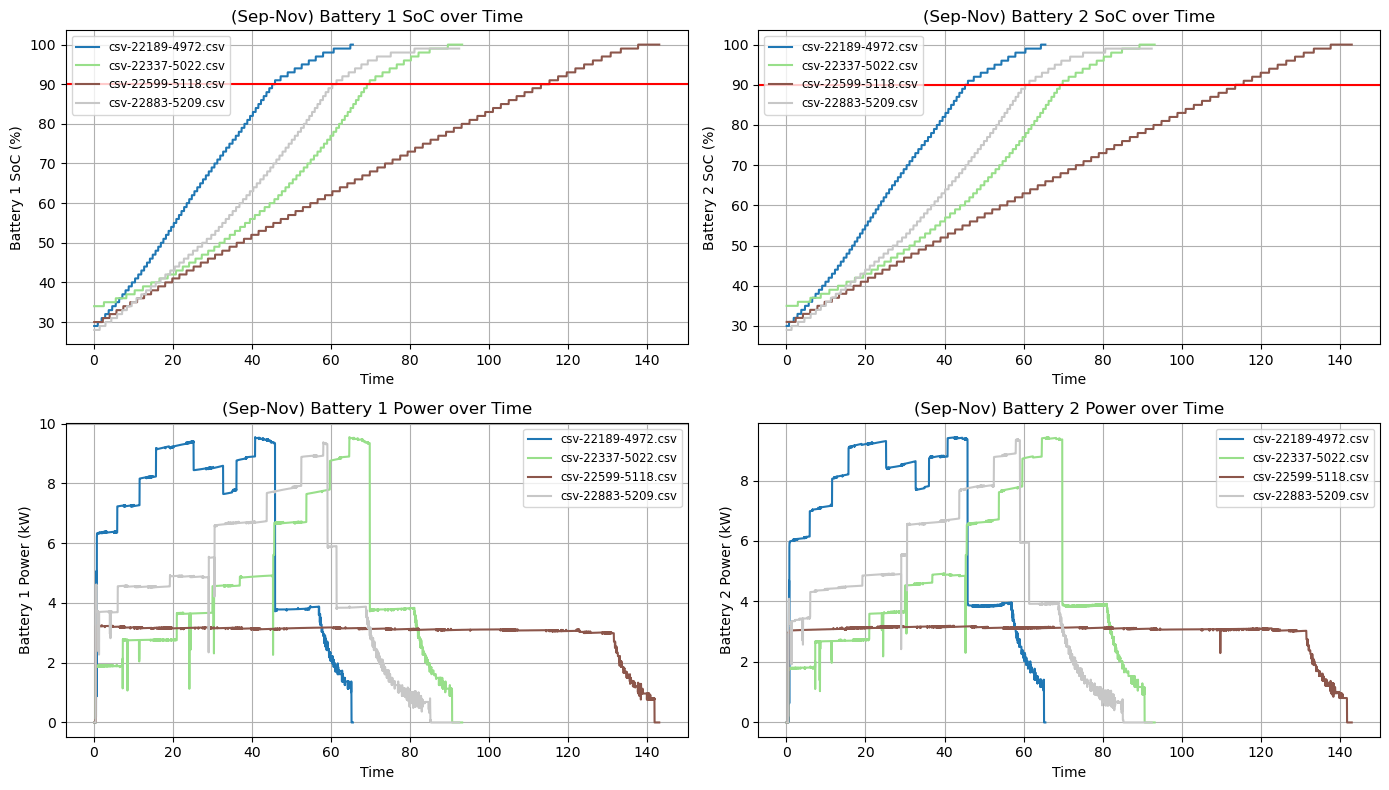

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush=False)
    
    axes[0,0].plot(df_power["time"][i], df_power["bat1C"][i], color=colormap(i / total_subfolders), label=file_list[i])
    axes[0,1].plot(df_power["time"][i], df_power["bat2C"][i], color=colormap(i / total_subfolders), label=file_list[i])
    axes[1,0].plot(df_power["time"][i], abs(df_power["bat1A"][i]*df_power["bat1V"][i]/1000), color=colormap(i / total_subfolders), label=file_list[i])
    axes[1,1].plot(df_power["time"][i], abs(df_power["bat2A"][i]*df_power["bat2V"][i]/1000), color=colormap(i / total_subfolders), label=file_list[i])
    
    

axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Battery 1 SoC (%)')
axes[0, 0].set_title('(Sep-Nov) Battery 1 SoC over Time')
axes[0, 0].axhline(y=90, color='r')
axes[0, 0].legend(loc='upper left', fontsize='small')
axes[0,0].grid(True)

axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Battery 2 SoC (%)')
axes[0, 1].set_title('(Sep-Nov) Battery 2 SoC over Time')
axes[0, 1].axhline(y=90, color='r')
axes[0, 1].legend(loc='upper left', fontsize='small')
axes[0,1].grid(True)

axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Battery 1 Power (kW)')
axes[1, 0].set_title('(Sep-Nov) Battery 1 Power over Time')
axes[1, 0].legend(loc='upper right', fontsize='small')
axes[1,0].grid(True)

axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Battery 2 Power (kW)')
axes[1, 1].set_title('(Sep-Nov) Battery 2 Power over Time')
axes[1, 1].legend(loc='upper right', fontsize='small')
axes[1,1].grid(True)

plt.tight_layout()

plt.savefig(r'C:\Users\Nathan\Documents\Backups\OnCall\fil_ch\sep-nov\graph-sep-nov.png')
plt.show()